In [27]:
# import modules and define functions
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, ticker, cm
import matplotlib as mpl
import os
os.environ['OMP_NUM_THREADS'] = "1"
def make_rdm1(mo_coeff, mo_occ):
    mocc = mo_coeff[:,mo_occ>0]
    return np.dot(mocc*mo_occ[mo_occ>0], mocc.conj().T)

In [67]:
outfs_dimer = [i for i in os.listdir(os.getcwd()) if i.endswith('.out') and 'H2' in i]
outfs_mononer = [i for i in os.listdir(os.getcwd()) if i.endswith('.out') and 'H_' in i]
data_dimer_dict = {}
data_monomer_dict = {}
for outf in outfs_dimer:
    mult = outf.split('_')[2]
    sd = outf.split('_')[3][0] + 'KS'
    sd = "%s%s" %(mult, sd)
    lines = open(outf, 'r').read().splitlines()
    for i, line in enumerate(lines):
        if '%paras' in line:
            nstep = 20
        if "The Calculated Surface using the 'Actual Energy'" in line:
            data = lines[i+1:i+1+nstep]
            data = [list(filter(None, i.split(' '))) for i in data]
            keys, es = np.array(data, dtype=float).T
            break
    data_dimer_dict[sd] = es

for outf in outfs_mononer:
    lines = open(outf, 'r').read().splitlines()
    for i, line in enumerate(lines):
        if 'FINAL SINGLE' in line:
            e_monomer = float(list(filter(None, line.split(' ')))[4])
            break

data_dict = {}
for key in data_dimer_dict.keys():
    data_dict[key] = data_dimer_dict[key] - np.array(e_monomer) * 2
    

In [68]:
df = pd.DataFrame(data_dict, dtype=float)
df.index = keys

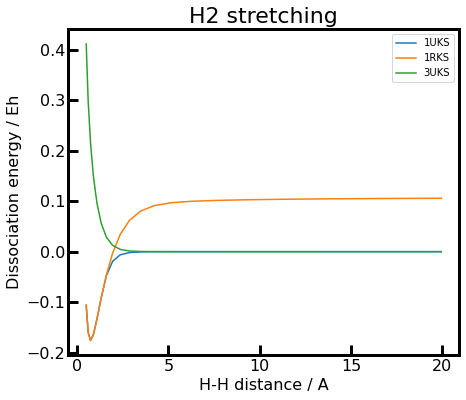

In [69]:
# plot the change of energy 
xlabel = 'H-H distance / A'
ylabel = 'Dissociation energy / Eh'
title = 'H2 stretching'
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 3
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 3
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

# plotting
fig, ax = plt.subplots(figsize=(7,6))
# ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
# ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
# ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
# ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))
# ax.set_ylim(-9, -4)
# ax.set_xlim(0.69,1.01)
ax.set_xlabel(xlabel, fontsize=16)
ax.set_ylabel(ylabel, fontsize=16)
ax.set_title(title, fontsize=22)
for key in df.columns: 
    ax.plot(df.index, df[key], label=key)

ax.legend()
